### MidTerm Exam

In [32]:
import seaborn as sns
import pandas as pd
import zipfile
import numpy as np
import math
import datetime
import matplotlib
import matplotlib.pyplot as plt

In [2]:
with zipfile.ZipFile("28864038.zip") as z:  
    with z.open("data/AON.csv") as f: 
        AON = pd.read_csv(f,index_col=['Date'], parse_dates=['Date']) #, date_parser=lambda d: pd.to_datetime(d, format="%y-%m-%d")
    with z.open("data/FDX.csv") as f: 
        FDX = pd.read_csv(f,index_col=['Date'], parse_dates=['Date'])
    with z.open("data/INVH.csv") as f: 
        INVH = pd.read_csv(f,index_col=['Date'], parse_dates=['Date'])
    with z.open("data/KDP.csv") as f: 
        KDP = pd.read_csv(f,index_col=['Date'], parse_dates=['Date'])
    with z.open("data/SYK.csv") as f: 
        SYK = pd.read_csv(f,index_col=['Date'], parse_dates=['Date'])

## PART 1

1. Is there a company that has no difference between the Close and Adj Close columns?
What does it mean from the financial point of view for the stock (you can get bonus
partial points)?

In [3]:
print(AON[AON["Close"] == AON["Adj Close"]].shape[0] == len(AON["Adj Close"]))
print(FDX[FDX["Close"] == FDX["Adj Close"]].shape[0] == len(FDX["Adj Close"]))
print(INVH[INVH["Close"] == INVH["Adj Close"]].shape[0] == len(INVH["Adj Close"]))
print(KDP[KDP["Close"] == KDP["Adj Close"]].shape[0] == len(KDP["Adj Close"]))
print(SYK[SYK["Close"] == SYK["Adj Close"]].shape[0] == len(SYK["Adj Close"]))

False
False
False
False
False


There is no data set where there is no difference between the "Adj Close" and the "Close" column. If there would be no difference between the two it would mean that the closing price is already clean, so everything the that the adjusted closing price accounts for (dividends...) is already "included" in the close price.

2. What is the highest and lowest price (Adj Close) each company recorded?

In [4]:
companies = ['AON', 'FDX', 'INVH', 'KDP', 'SYK']
ex_AON = [max(AON["Adj Close"]), min(AON["Adj Close"])]
ex_FDX = [max(FDX["Adj Close"]), min(FDX["Adj Close"])]
ex_INVH = [max(INVH["Adj Close"]), min(INVH["Adj Close"])]
ex_KDP = [max(KDP["Adj Close"]), min(KDP["Adj Close"])]
ex_SYK = [max(SYK["Adj Close"]), min(SYK["Adj Close"])]

The above objects contain the minimum and maximum for each company, the first item [0] of the list object always refers to the maximum and the second item [1] to the minimum.

(1pt task) Calculate logarithmic returns from Adj Close. For each company report on
its, min, max, mean, median of the return distribution.

In [5]:
log_rt_AON = np.log(AON["Adj Close"]).diff()
log_rt_FDX = np.log(FDX["Adj Close"]).diff()
log_rt_INVH = np.log(INVH["Adj Close"]).diff()
log_rt_KDP = np.log(KDP["Adj Close"]).diff()
log_rt_SYK = np.log(SYK["Adj Close"]).diff()

log_list = [log_rt_AON, log_rt_FDX, log_rt_INVH, log_rt_KDP, log_rt_SYK]

for i in log_list:
    print(i.min(), i.max(), i.mean(), i.median())

-0.18275934056110277 0.1321902249991478 0.0006142480648189757 0.0009881583152346884
-0.24084700040183282 0.1346565013518637 -0.00014123841166971103 0.0006942548259791792
-0.2685200886684873 0.11743856049046686 0.0003100771581096164 0.0008560924608562726
-0.18019339152285196 0.20207621316823587 0.0008529045038359853 0.0008566684595416874
-0.14047996587872724 0.12567461798570712 0.0003276299903862368 0.0010611907206503624


Each row corresponds to the min, max, mean and median of a company.
The order of the rows corresponds to the order of the elements of the log_list object.

4. When did each company record the highest gain and highest loss for the day?
(logarithmic loss). Hint: idxmax

In [6]:
print(log_rt_AON.idxmax())
print(log_rt_FDX.idxmax())
print(log_rt_INVH.idxmax())
print(log_rt_KDP.idxmax())
print(log_rt_SYK.idxmax())
# These values correspond to the days where the companys had their maximum log gain.

2020-03-24 00:00:00
2022-06-14 00:00:00
2020-03-24 00:00:00
2018-01-29 00:00:00
2020-03-24 00:00:00


In [7]:
print(log_rt_AON.idxmin())
print(log_rt_FDX.idxmin())
print(log_rt_INVH.idxmin())
print(log_rt_KDP.idxmin())
print(log_rt_SYK.idxmin())
# These values correspond to the days where the companys had their maximum log loss.

2020-03-09 00:00:00
2022-09-16 00:00:00
2020-03-16 00:00:00
2020-03-16 00:00:00
2020-04-01 00:00:00


5. What is the average calendar weekly volume for each company? Hint: check how to
resample pandas DF

6. Which company recorded the highest total return over the whole period?

In [8]:
log_rt_AON[:].sum()

0.7727240655422714

In [9]:
tot_rt_AON = log_rt_AON.sum()
tot_rt_FDX = log_rt_FDX.sum()
tot_rt_INVH = log_rt_INVH.sum()
tot_rt_KDP = log_rt_KDP.sum()
tot_rt_SYK = log_rt_SYK.sum()

tot_rt_AON, tot_rt_FDX, tot_rt_INVH, tot_rt_KDP, tot_rt_SYK
# KDP had the highest total log. return 

(0.7727240655422714,
 -0.17767792188049647,
 0.3900770649018974,
 1.0721009613218335,
 0.4121585279058859)

7. Plot the log-returns of the companies (ideally in the same plot)

<Axes: xlabel='Date'>

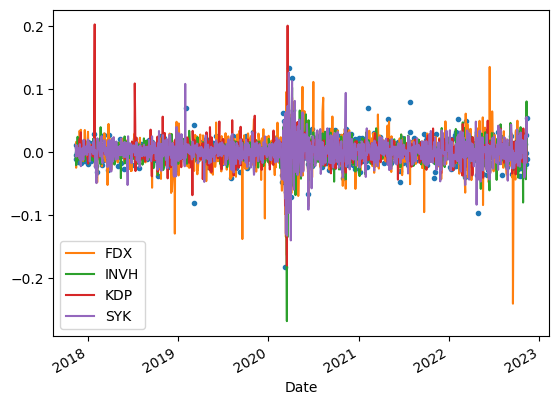

In [19]:
ax = log_rt_AON.plot(style='.',grid=True, label = "AON")  
log_rt_FDX.plot(label='FDX',ax=ax,legend=True) 
log_rt_INVH.plot(label='INVH',ax=ax,legend=True)
log_rt_KDP.plot(label='KDP',ax=ax,legend=True)
log_rt_SYK.plot(label='SYK',ax=ax,legend=True)

8. Show the log-return distribution of the companies’ returns (ideally in the same plot
with each company having separate line). Choose appropriate type of visualization.

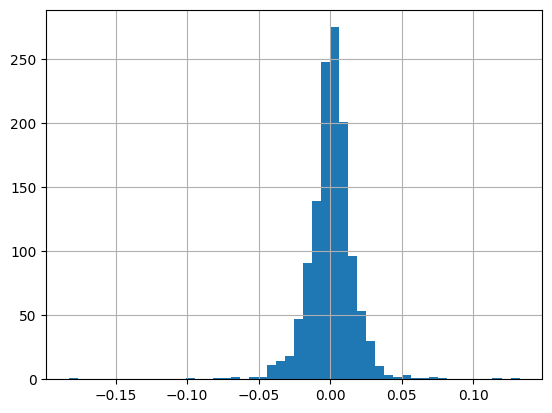

In [35]:
ax1 = log_rt_AON.hist(grid=True, label = "AON", bins= 50) 

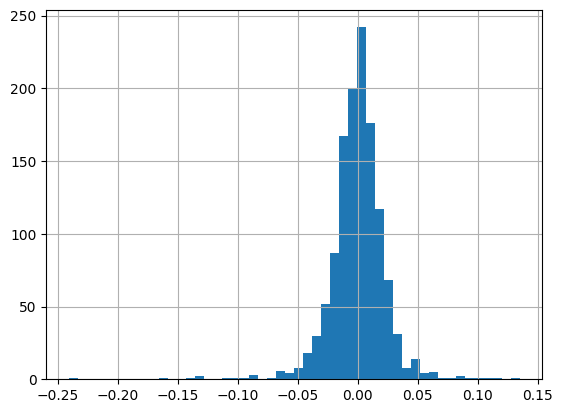

In [36]:
ax2 = log_rt_FDX.hist(grid=True, label = "FDX", bins= 50)   

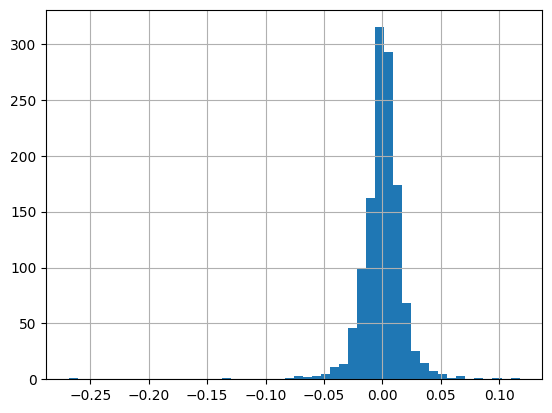

In [37]:
ax3 = log_rt_INVH.hist(grid=True, label = "INVH", bins= 50)  

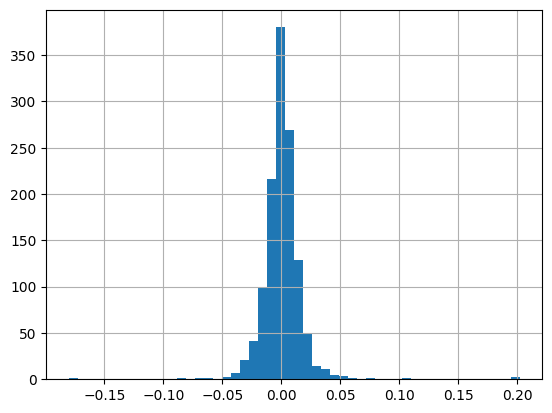

In [39]:
ax4 = log_rt_KDP.hist(grid=True, label = "KDP", bins= 50) 

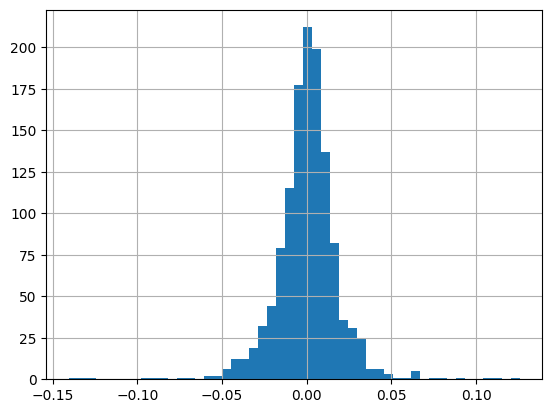

In [38]:
ax5 = log_rt_SYK.hist(grid=True, label = "SYK", bins= 50) 